<a href="https://colab.research.google.com/github/yunsing/Compsci361/blob/master/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-means clustering
There are many clustering algorithms are available in Scikit-Learn and the simplest clustering algorthm to understand is  known as k-means clustering, which is implemented in `sklearn.cluster.KMeans`.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  
import numpy as np


**Introducing k-Means**

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. 

First, we generate a two-dimensional dataset containing four distinct blobs. To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization


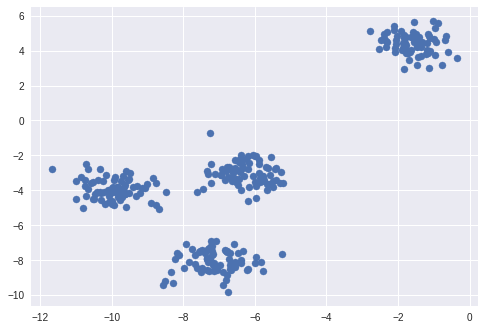

In [0]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=1)
plt.scatter(X[:, 0], X[:, 1], s=50);

It is relatively easy to pick out the four clusters. The k-means algorithm does this automatically, and in Scikit-Learn uses the typical estimator API:

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Now visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator:


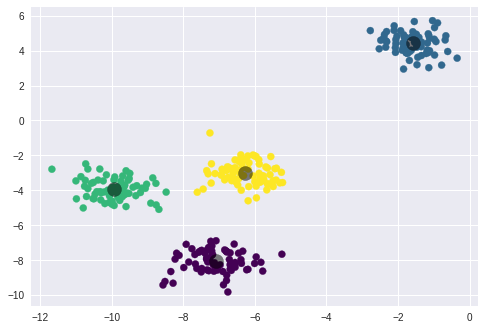

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);



The good news is that the k-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye. But you might wonder how this algorithm finds these clusters so quickly!


### **Setting the right k**
 
The number of clusters must be selected beforehand

Another common challenge with k-means is that you must tell it how many clusters you expect: it cannot learn the number of clusters from the data. 

If we ask the algorithm to identify ten clusters (k=10), k-means will proceed and find the best ten clusters.

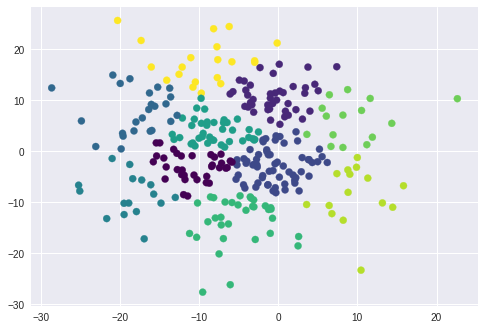

In [0]:
labels = KMeans(10, random_state=1).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### k-means is limited to linear cluster boundaries

The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.

Consider the following data, along with the cluster labels found by the typical k-means approach:

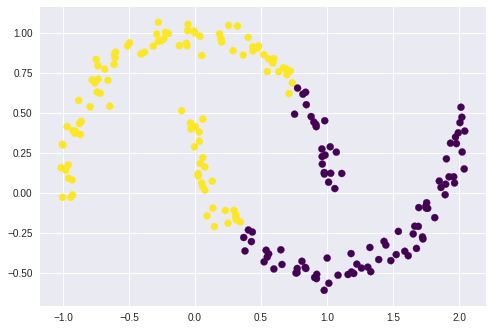

In [0]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=1)
                  
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Why does it separate the clusters as shown above?

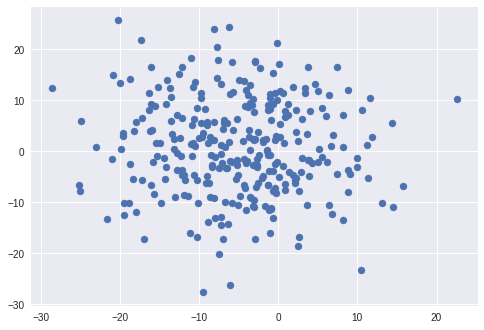

In [0]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=10, cluster_std=8.0, random_state=1)
plt.scatter(X[:, 0], X[:, 1], s=50);